# 2023-1 Artificial Intelligence (01)
## Homework #2: Implementation of a CNN with TensforFlow Keras
---
Copyright (c) Prof. Jaehyeong Sim 

Department of Computer Science and Engineering

ELTEC College of Engineering

Ewha Womans University

## Guideline
### Introduction
> Here in this homework assignment 2, we will implement a CNN using TensorFlow Keras library.

### Your job
1. Please complete the code. You only have to write the parts marked as **### Please fill here**.
2. Please run your code with GPU session
3. Please answer the questions at the bottom of this notebook.

### Submission guide
1. Please rename the completed skeleton file to **HW2.ipynb**.
2. Zip the file into ***STUDENT_ID*.zip**. Your own student ID goes to *STUDENT_ID*. For example, if your student ID is 2312345, the file name should be **2312345.zip**
3. Turn in the zip file into the Ewha CyberCampus.

⚠ If you doesn't follow the submission guide above, you will get **5 point deduction** from this homework score.

### Importing necessary libraries

In [89]:
import tensorflow.keras as keras
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

### Loading and preprocessing MNIST dataset

In [90]:
(X_train, y_train), (X_valid, y_valid) = mnist.load_data()
X_train = X_train.reshape(60000, 28, 28, 1).astype('float32')
X_valid = X_valid.reshape(10000, 28, 28, 1).astype('float32')
X_train /= 255
X_valid /= 255
n_classes = 10
y_train = keras.utils.to_categorical(y_train, n_classes)
y_valid = keras.utils.to_categorical(y_valid, n_classes)

### Define residual block
**Parameters:**
*   x: input
*   ch: output channel size
*   k: kernel size

**Return:**
*   final output

**The diagram of residual block:**

![[2023-1 AI] HW2.png](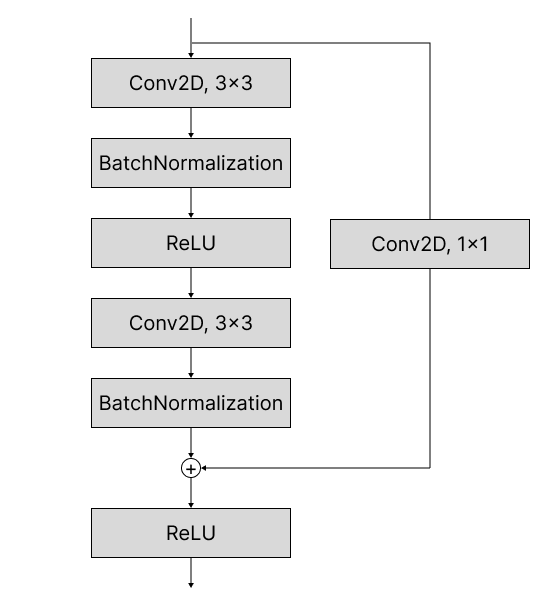)

In [91]:
def ResidualBlock(x, ch, k):
    X_shortcut = x
    
    X = layers.Conv2D(ch, k, padding='SAME')(x)
    X = layers.BatchNormalization()(x)
    X = layers.Activation('relu')(x)
    
    X = layers.Conv2D(ch, k, padding='SAME')(x)
    X = layers.BatchNormalization()(x)
    
    # Add
    X = layers.Add()([X, X_shortcut])
    X = layers.Activation('relu')(X)

    return X
  ### Please fill here
  # Hint: use layers.Add() to merge skip connection

### Define the whole network
**The diagram of ResNet7:**

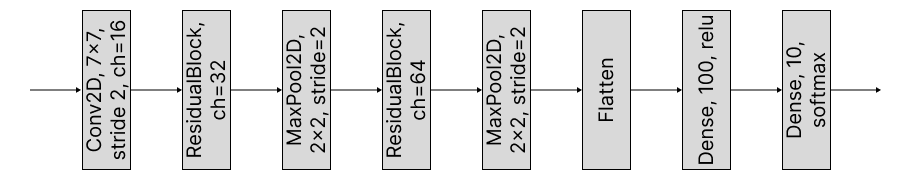

In [92]:
def ResNet7():
  X = layers.Input((28,28,1))

  y = layers.Conv2D(16, kernel_size = 7, strides = 2)(X)
  y = ResidualBlock(y, 32, 3)

  y = layers.MaxPooling2D(pool_size=(2, 2), strides=2)(y)
  y = ResidualBlock(y, 64, 3)
  
  y = layers.Flatten()(y)
  y = layers.Dense(100, activation = "relu")(y)
  y = layers.Dense(10, activation = "softmax")(y)



  model = models.Model(inputs=X, outputs=y)

  model.compile(loss="categorical_crossentropy", optimizer=keras.optimizers.Adam(),metrics=["accuracy"])

  return model
  ### Please fill here

In [93]:
def ResNet7_Dropout():
  X = layers.Input((28,28,1))

  y = layers.Conv2D(16, kernel_size = 7, strides = 2)(X)
  y = ResidualBlock(y, 32, 3)

  y = layers.MaxPooling2D(pool_size=(2, 2), strides=2)(y)
  y = ResidualBlock(y, 64, 3)
  
  y = layers.Flatten()(y)
  y = layers.Dense(100, activation = "relu")(y)
  y = layers.Dropout(rate=0.3)(y)
  y = layers.Dense(10, activation = "softmax")(y)



  model = models.Model(inputs=X, outputs=y)

  model.compile(loss="categorical_crossentropy", optimizer=keras.optimizers.Adam(),metrics=["accuracy"])

  return model
  ### Please fill here

In [94]:
def add_regularization(model, regularizer=keras.regularizers.l2(0.0001)):

    for layer in model.layers:
        for attr in ['kernel_regularizer']:
            if hasattr(layer, attr):
              setattr(layer, attr, regularizer)
    return model

### Model instantiation

In [95]:
model = ResNet7()

In [96]:
model.summary()

Model: "model_11"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_17 (InputLayer)          [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 conv2d_80 (Conv2D)             (None, 11, 11, 16)   800         ['input_17[0][0]']               
                                                                                                  
 batch_normalization_59 (BatchN  (None, 11, 11, 16)  64          ['conv2d_80[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 add_29 (Add)                   (None, 11, 11, 16)   0           ['batch_normalization_59[0

In [97]:
model_dropout = ResNet7_Dropout()

In [98]:
model_dropout.summary()

Model: "model_12"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_18 (InputLayer)          [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 conv2d_85 (Conv2D)             (None, 11, 11, 16)   800         ['input_18[0][0]']               
                                                                                                  
 batch_normalization_63 (BatchN  (None, 11, 11, 16)  64          ['conv2d_85[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 add_31 (Add)                   (None, 11, 11, 16)   0           ['batch_normalization_63[0

In [99]:
model_dropout_L2=add_regularization(model_dropout)

In [100]:
model_dropout_L2.summary()

Model: "model_12"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_18 (InputLayer)          [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 conv2d_85 (Conv2D)             (None, 11, 11, 16)   800         ['input_18[0][0]']               
                                                                                                  
 batch_normalization_63 (BatchN  (None, 11, 11, 16)  64          ['conv2d_85[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 add_31 (Add)                   (None, 11, 11, 16)   0           ['batch_normalization_63[0

### Training loop

In [101]:
history = model.fit(
    X_train, 
    y_train, 
    batch_size = 256, 
    epochs = 20,
	  verbose = 1,
    validation_data=(X_valid, y_valid))

Epoch 1/20
235/235 [==============================] - 3s 5ms/step - loss: 0.3224 - accuracy: 0.9020 - val_loss: 0.2510 - val_accuracy: 0.9663
Epoch 2/20
235/235 [==============================] - 1s 5ms/step - loss: 0.0808 - accuracy: 0.9761 - val_loss: 0.0758 - val_accuracy: 0.9764
Epoch 3/20
235/235 [==============================] - 1s 5ms/step - loss: 0.0561 - accuracy: 0.9828 - val_loss: 0.0524 - val_accuracy: 0.9829
Epoch 4/20
235/235 [==============================] - 1s 5ms/step - loss: 0.0439 - accuracy: 0.9866 - val_loss: 0.0502 - val_accuracy: 0.9840
Epoch 5/20
235/235 [==============================] - 1s 5ms/step - loss: 0.0352 - accuracy: 0.9893 - val_loss: 0.0493 - val_accuracy: 0.9846
Epoch 6/20
235/235 [==============================] - 1s 5ms/step - loss: 0.0283 - accuracy: 0.9914 - val_loss: 0.0458 - val_accuracy: 0.9860
Epoch 7/20
235/235 [==============================] - 1s 5ms/step - loss: 0.0240 - accuracy: 0.9928 - val_loss: 0.0433 - val_accuracy: 0.9861
Epoch 

In [102]:
history_dropout = model_dropout.fit(
    X_train, 
    y_train, 
    batch_size = 256, 
    epochs = 20,
	  verbose = 1,
    validation_data=(X_valid, y_valid))

Epoch 1/20
235/235 [==============================] - 3s 6ms/step - loss: 0.4243 - accuracy: 0.8703 - val_loss: 0.2804 - val_accuracy: 0.9553
Epoch 2/20
235/235 [==============================] - 1s 5ms/step - loss: 0.1269 - accuracy: 0.9615 - val_loss: 0.0723 - val_accuracy: 0.9768
Epoch 3/20
235/235 [==============================] - 1s 4ms/step - loss: 0.0914 - accuracy: 0.9724 - val_loss: 0.0548 - val_accuracy: 0.9823
Epoch 4/20
235/235 [==============================] - 1s 5ms/step - loss: 0.0742 - accuracy: 0.9766 - val_loss: 0.0450 - val_accuracy: 0.9845
Epoch 5/20
235/235 [==============================] - 1s 5ms/step - loss: 0.0609 - accuracy: 0.9815 - val_loss: 0.0431 - val_accuracy: 0.9849
Epoch 6/20
235/235 [==============================] - 1s 5ms/step - loss: 0.0538 - accuracy: 0.9832 - val_loss: 0.0398 - val_accuracy: 0.9855
Epoch 7/20
235/235 [==============================] - 1s 4ms/step - loss: 0.0474 - accuracy: 0.9852 - val_loss: 0.0368 - val_accuracy: 0.9886
Epoch 

In [103]:
history_dropout_L2 = model_dropout_L2.fit(
    X_train, 
    y_train, 
    batch_size = 256, 
    epochs = 20,
	  verbose = 1,
    validation_data=(X_valid, y_valid))

Epoch 1/20
235/235 [==============================] - 1s 5ms/step - loss: 0.0172 - accuracy: 0.9943 - val_loss: 0.0369 - val_accuracy: 0.9905
Epoch 2/20
235/235 [==============================] - 1s 5ms/step - loss: 0.0166 - accuracy: 0.9945 - val_loss: 0.0365 - val_accuracy: 0.9900
Epoch 3/20
235/235 [==============================] - 1s 5ms/step - loss: 0.0173 - accuracy: 0.9941 - val_loss: 0.0408 - val_accuracy: 0.9892
Epoch 4/20
235/235 [==============================] - 1s 5ms/step - loss: 0.0169 - accuracy: 0.9944 - val_loss: 0.0394 - val_accuracy: 0.9891
Epoch 5/20
235/235 [==============================] - 1s 5ms/step - loss: 0.0152 - accuracy: 0.9949 - val_loss: 0.0390 - val_accuracy: 0.9891
Epoch 6/20
235/235 [==============================] - 1s 5ms/step - loss: 0.0151 - accuracy: 0.9949 - val_loss: 0.0397 - val_accuracy: 0.9895
Epoch 7/20
235/235 [==============================] - 1s 5ms/step - loss: 0.0148 - accuracy: 0.9948 - val_loss: 0.0451 - val_accuracy: 0.9891
Epoch 

### Plot training curve

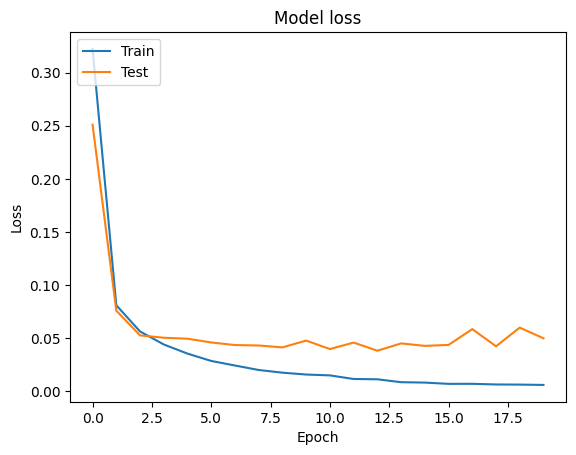

In [104]:
# regularization 없음
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [105]:
import pandas as pd
dic_hist = {"loss":history.history["loss"],"val_loss":history.history["val_loss"]} 
naive = pd.DataFrame(dic_hist)
naive.describe()

,loss,val_loss
count,20.000000,20.000000
mean,0.036417,0.058163
std,0.070104,0.046204
min,0.005745,0.037981
25%,0.007654,0.042810
50%,0.015131,0.045714
75%,0.030058,0.050766
max,0.322394,0.251003


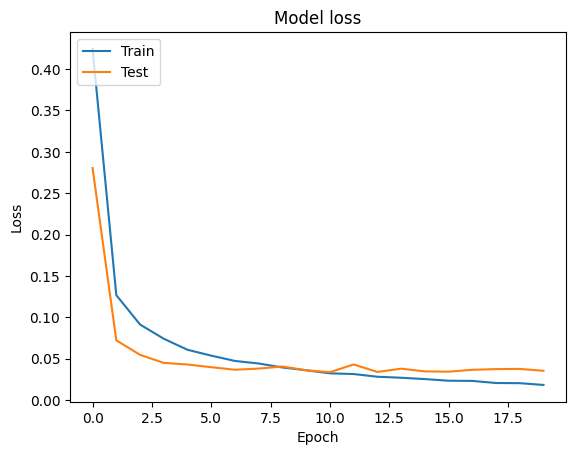

In [106]:
# droup out 추가 
plt.plot(history_dropout.history['loss'])
plt.plot(history_dropout.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [107]:
import pandas as pd
dic_hist = {"loss":history_dropout.history["loss"],"val_loss":history_dropout.history["val_loss"]} 
drop = pd.DataFrame(dic_hist)
drop.describe()

,loss,val_loss
count,20.000000,20.000000
mean,0.062515,0.052650
std,0.089465,0.054338
min,0.018427,0.033795
25%,0.024998,0.035973
50%,0.034267,0.037917
75%,0.055578,0.043115
max,0.424347,0.280391


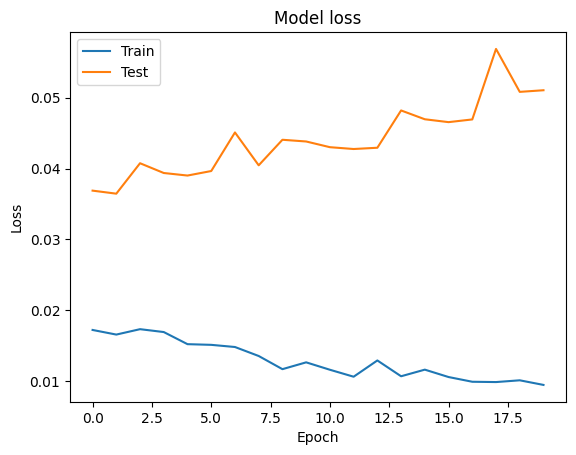

In [108]:
# droup out, L2 추가 
plt.plot(history_dropout_L2.history['loss'])
plt.plot(history_dropout_L2.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [109]:
import pandas as pd
dic_hist = {"loss":history_dropout_L2.history["loss"],"val_loss":history_dropout_L2.history["val_loss"]} 
drop_L2 = pd.DataFrame(dic_hist)
drop_L2.describe()

,loss,val_loss
count,20.000000,20.000000
mean,0.012921,0.044087
std,0.002719,0.005153
min,0.009461,0.036458
25%,0.010608,0.040259
50%,0.012167,0.043421
75%,0.015142,0.046942
max,0.017330,0.056889


### Question 1. Report training curve (Epoch vs. Loss) and final validation accuracy without any regularization method.

#### Answer:

### Question 2. Report training curve (Epoch vs. Loss) and final validation accuracy with dropout applied (dropout rate: 0.3). Explain how you applied dropout on your code.

#### Answer:

### Question 3. Report training curve (Epoch vs. Loss) and final validation accuracy with dropout and weight decay applied (L2 regularization with 0.001). Explain how you applied weight decay on your code.

#### Answer: